# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the headers

In [1]:
import numpy as np
import pandas as pd
import re
import io
import requests
import dropbox
import matplotlib.pyplot as plt
from contextlib import closing # this will correctly close the request
import warnings
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

### Importing the data

In [2]:
# # Imports and initialization of variables
# token = "sl.As610-hH2MziURDOYHx_30sPHRiQJsw6fetjWBHcip64VWuVW2mM99jTRc_AMdpHTG7uCvdLfGaW25wv-ycGwusoAvc4ojBdii2mebG_DkVf-zEqVtErTSe67gOzYMMH35qpQew" #get token on https://www.dropbox.com/developers/apps/
# dbx = dropbox.Dropbox(token)
# user_detais = dbx.users_get_current_account()

In [3]:
# dbx.files_copy(from_path= "/Intern_anant0301/INSAID", to_path= "/INSAID_Task/")

In [4]:
df = pd.read_csv("./Churn.csv")

### Understanding the data

In [5]:
df.shape

(7043, 21)

The dataframe doesn't contain the any **missing values**.

In [6]:
is_number = lambda x: re.match(r'[+-]?[0-9]+\.?[0-9]*', str(x))

# the data has space in them 
[x for x in df.TotalCharges if is_number(x) is None]

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']

In [7]:
for i in df.index:
    if " " in df.TotalCharges.iloc[i]:
        df.TotalCharges.iloc[i] = np.nan

In [8]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df.dropna(inplace= True)

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208
std,0.368844,24.545260,30.085974
min,0.000000,1.000000,18.250000
25%,0.000000,9.000000,35.587500
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.862500
max,1.000000,72.000000,118.750000


In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.TotalCharges = df.TotalCharges.astype(float)

In [14]:
# the columns containing only numeric
numeric_col = [
    "tenure",
    "MonthlyCharges",
    "TotalCharges"
]
# the columns containing only string
string_col = [
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
    "Churn"
]

# the column CustomerID is not useful 

print("Length: %s\nNumeric Columns: %s" % (len(numeric_col), numeric_col), end= '\n\n')
print("Length: %s\nString Columns: %s" % (len(string_col), string_col), end= '\n\n')

Length: 3
Numeric Columns: ['tenure', 'MonthlyCharges', 'TotalCharges']

Length: 16
String Columns: ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']



In [15]:
df.shape

(7032, 21)

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


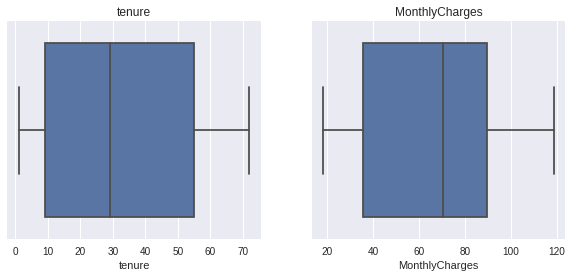

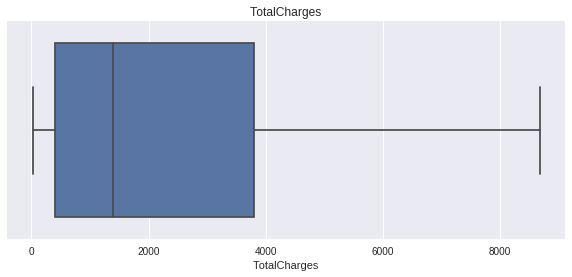

In [17]:
i = 0
# while i < len(string_col):
fig = plt.figure(figsize=[10,4])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.title.set_text(numeric_col[i])
plt.subplot(1,2,1)
sns.boxplot(x= numeric_col[i], data= df)
i += 1

ax2.title.set_text(numeric_col[i])
plt.subplot(1,2,2)
sns.boxplot(x= numeric_col[i], data= df)
i += 1    
plt.show()

fig = plt.figure(figsize=[10,4])
ax1 = fig.add_subplot(111)
ax1.title.set_text(numeric_col[i])
sns.boxplot(x= numeric_col[i], data= df)
plt.show()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64


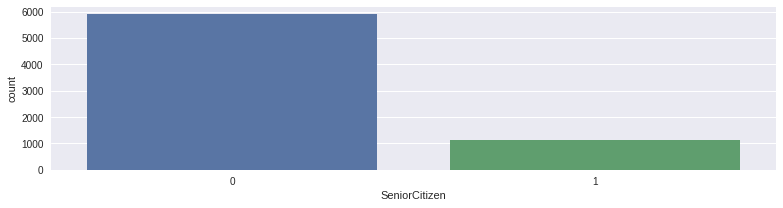

No     3639
Yes    3393
Name: Partner, dtype: int64


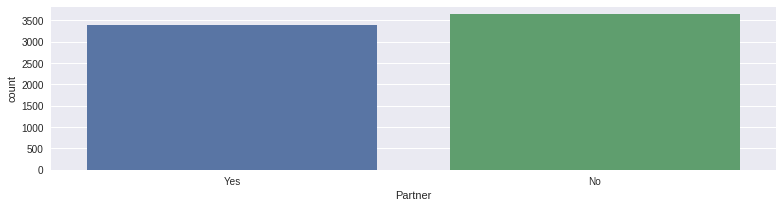

No     4933
Yes    2099
Name: Dependents, dtype: int64


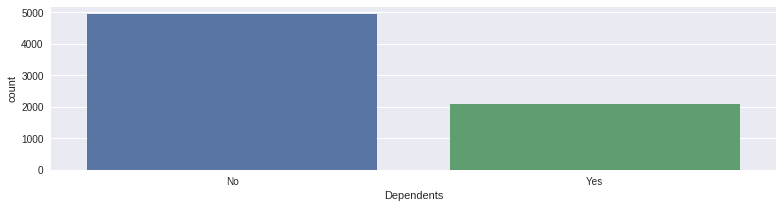

Yes    6352
No      680
Name: PhoneService, dtype: int64


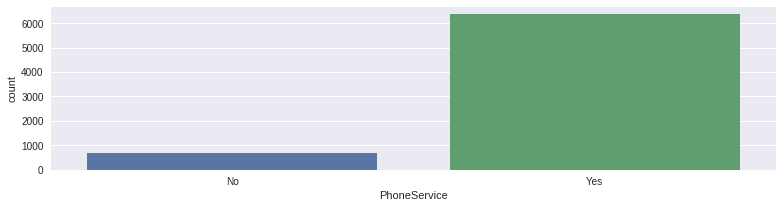

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


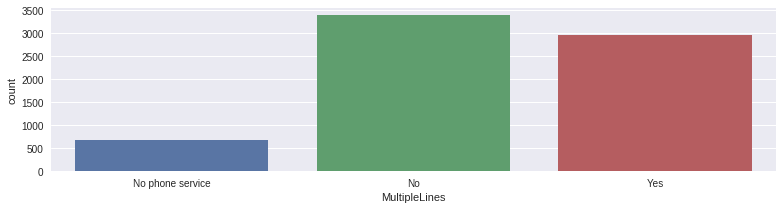

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64


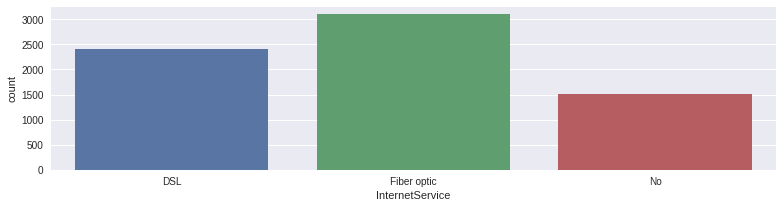

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64


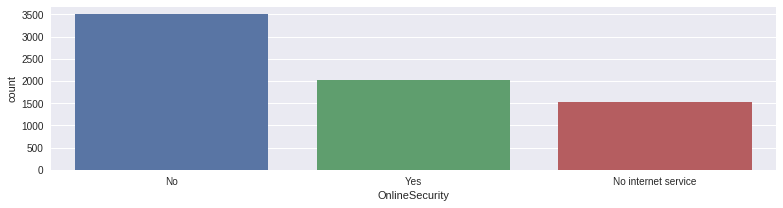

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64


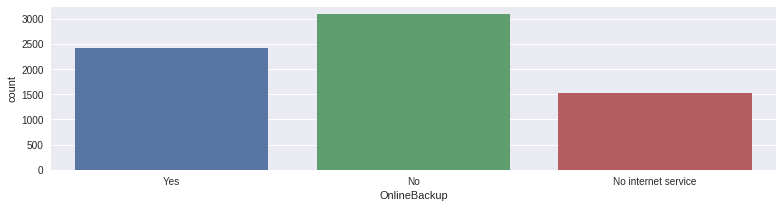

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64


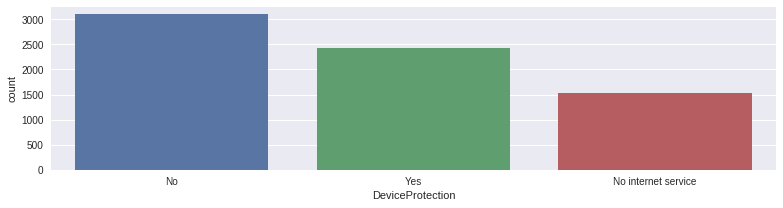

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64


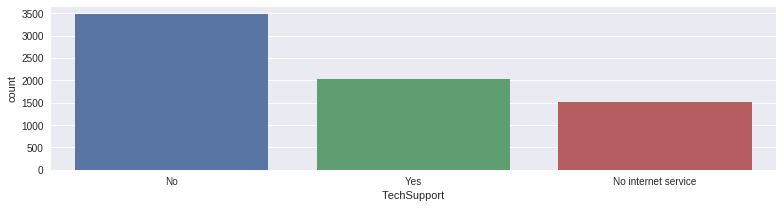

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64


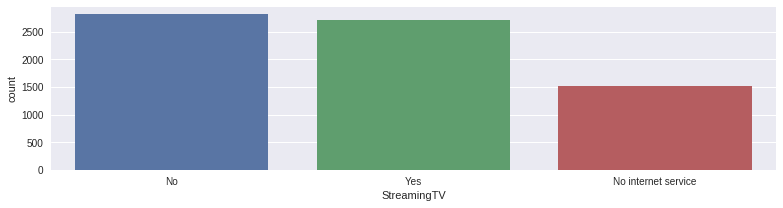

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64


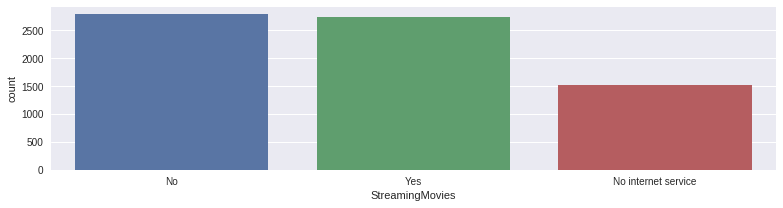

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


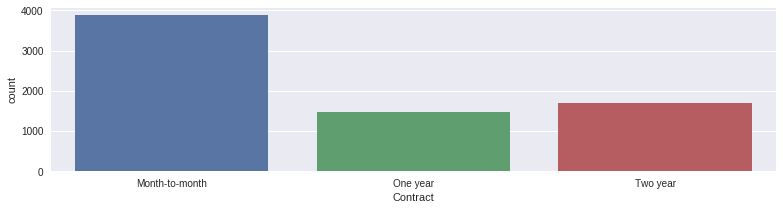

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64


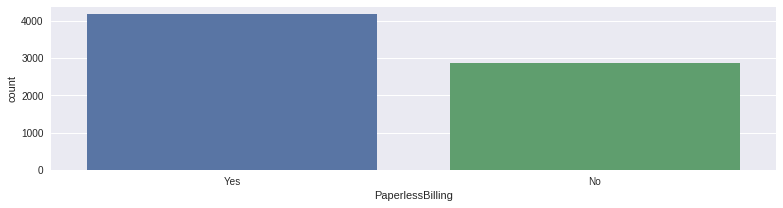

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


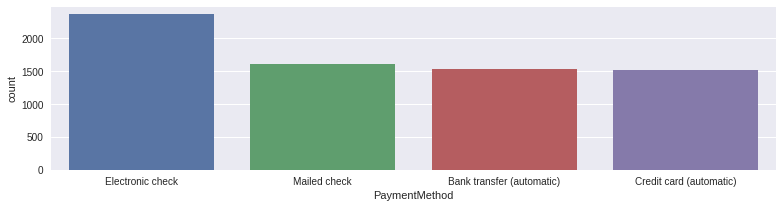

No     5163
Yes    1869
Name: Churn, dtype: int64


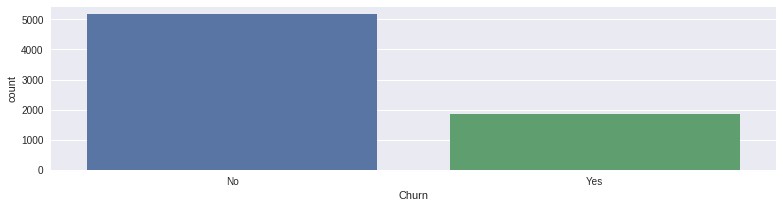

In [18]:
i = 0
for i in range(len(string_col)):
    fig = plt.figure(figsize= [13,3])
    ax1.title.set_text(string_col[i])
    sns.countplot(x= string_col[i], data= df)
    print(df[string_col[i]].value_counts())
    i += 1
    plt.show()


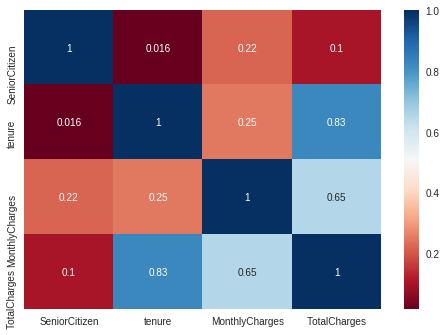

In [19]:
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

### Data Manipulation

In [20]:
# remove customerID from the df 
# this relates more to customer information 
df.drop('customerID', axis= 1, inplace= True)

In [21]:
df[string_col] = df[string_col].astype('category')

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
df[string_col] = OneHotEncoder(df[string_col])

### Data Visualization

In [24]:
### Conclusion: What all did you understand from the above charts

### Implement Machine Learning Models

### Model Evaluation

### Final Conclusions